### *Heart Failure Prediction*


### **--Objective--**

*The primary objective of this project is to explore, implement, and compare machine learning techniques specifically Decision Trees and Random Forests to predict the likelihood of heart disease in patients based on clinical and demographic factors. The goal is not only to build predictive models but also to understand the intuition behind these algorithms, analyze their strengths and limitations, and evaluate their performance using real-world data.*

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the data.
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.shape

(918, 12)

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


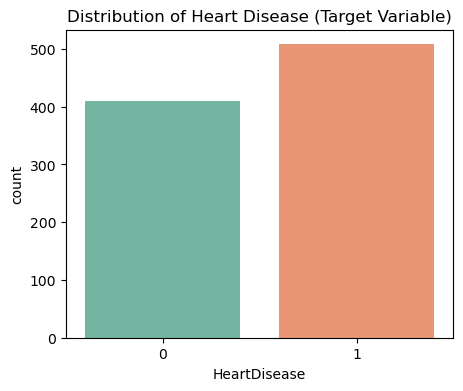

In [ ]:
#Distribution of target variable
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="HeartDisease", hue="HeartDisease", palette="Set2", legend=False)
plt.title("Distribution of Heart Disease (Target Variable)")
plt.show()

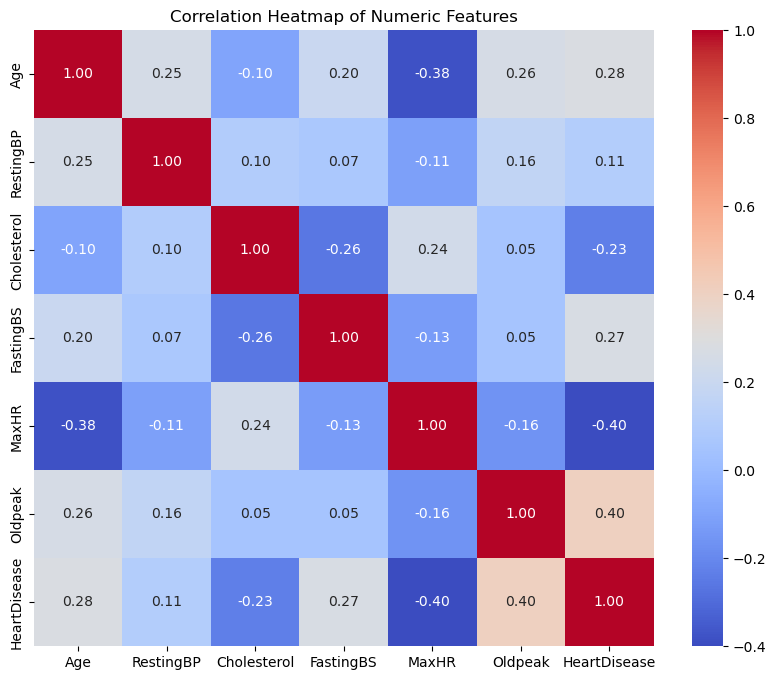

In [ ]:
#Correlation heatmap
plt.figure(figsize=(10,8))
numeric_corr = df.corr(numeric_only=True)
sns.heatmap(numeric_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

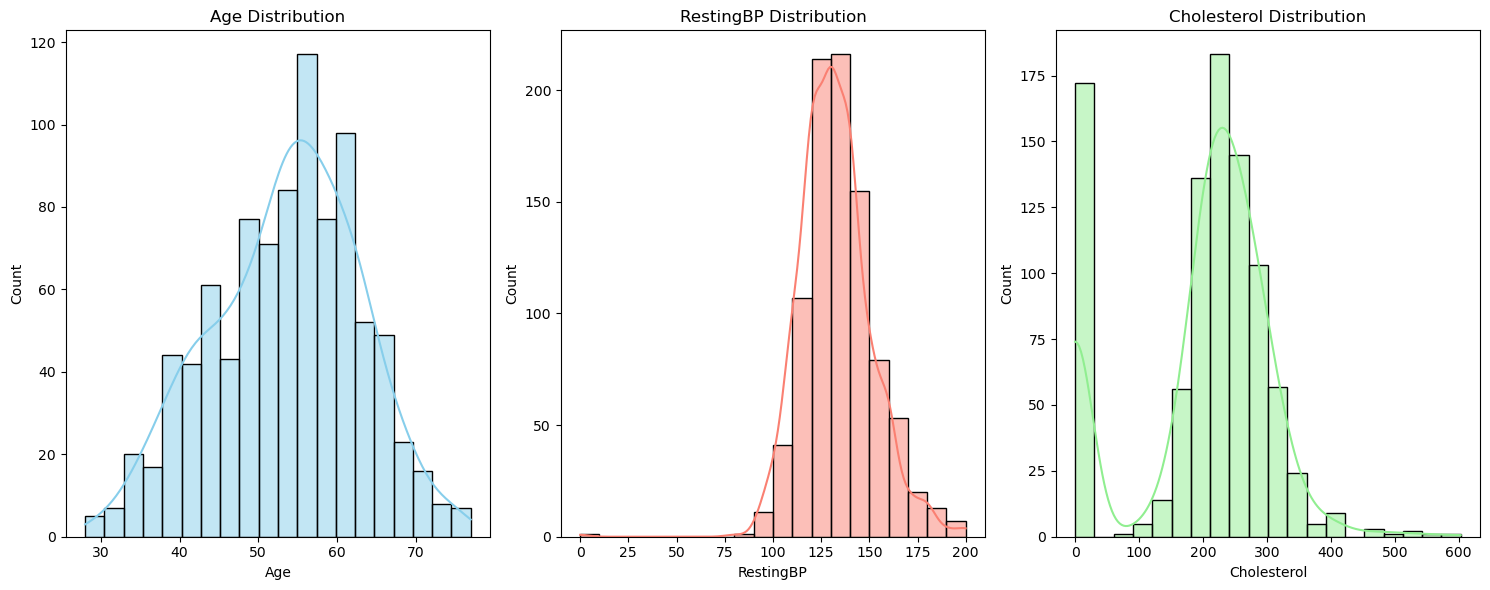

In [ ]:
# Histograms for numerical features
fig, axes = plt.subplots(1, 3, figsize=(15,6))
sns.histplot(df["Age"], bins=20, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Age Distribution")

sns.histplot(df["RestingBP"], bins=20, kde=True, ax=axes[1], color="salmon")
axes[1].set_title("RestingBP Distribution")

sns.histplot(df["Cholesterol"], bins=20, kde=True, ax=axes[2], color="lightgreen")
axes[2].set_title("Cholesterol Distribution")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
categorical_cols = df.select_dtypes(include="object").columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Train-test split
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTrain/Test Sizes:", X_train.shape, X_test.shape)


Train/Test Sizes: (734, 11) (184, 11)



Decision Tree Performance
Accuracy: 0.8097826086956522

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79        82
           1       0.83      0.83      0.83       102

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184



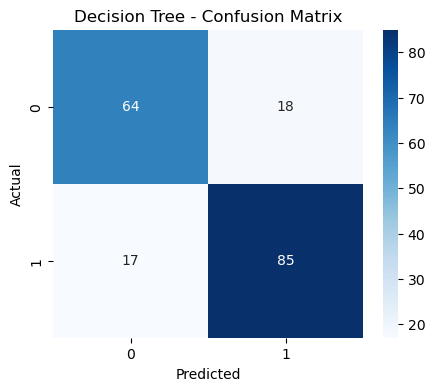

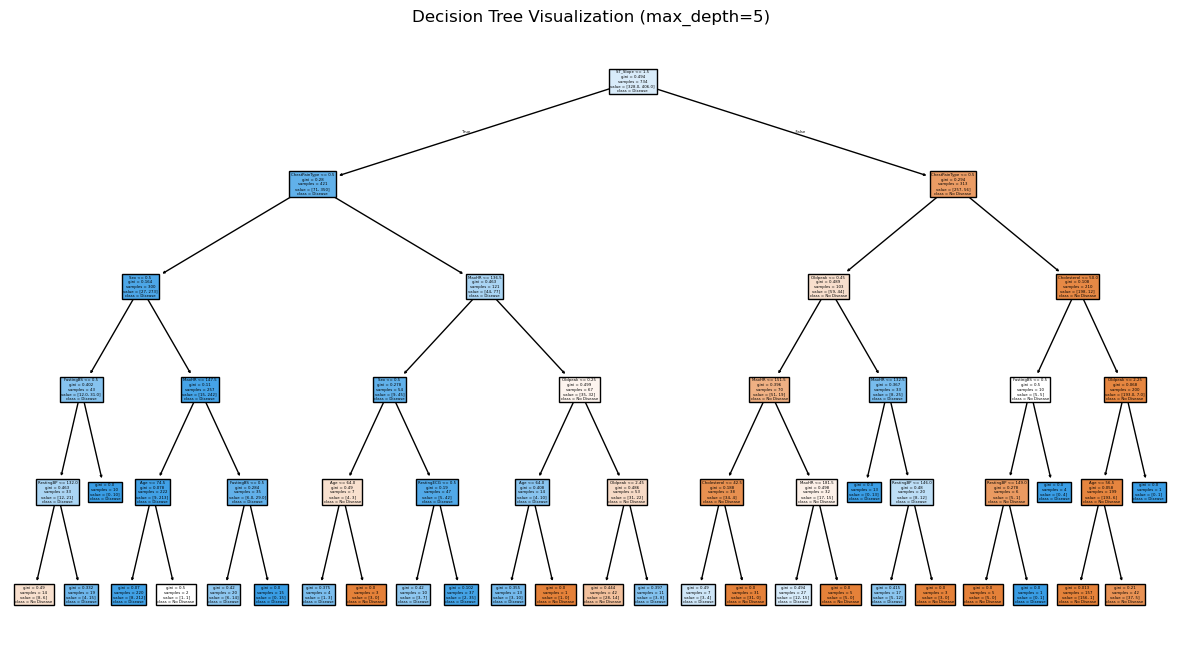

In [ ]:
# Section 2: Model Implementation
# ===============================

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize Decision Tree
plt.figure(figsize=(15,8))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree Visualization (max_depth=5)")
plt.show()



Random Forest Performance
Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



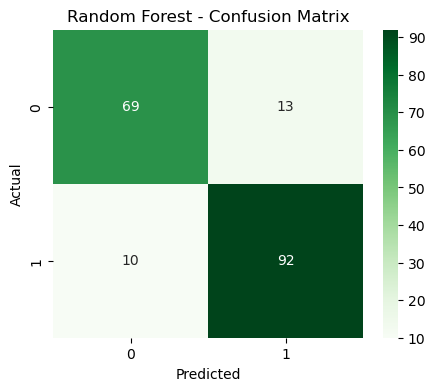

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
#Section 3: Model Comparison

print("\nModel Comparison:")
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Model Comparison:
Decision Tree Accuracy: 0.8097826086956522
Random Forest Accuracy: 0.875


### **Interpretation:**

**Decision Tree:**
* Pros: Simple, interpretable.
* Cons: Sensitive to noise, easily overfits (due to high variance).

**Random Forest:**
* Pros: Reduces variance via ensembling, improves accuracy, more robust.
* Cons: Slower to train, less interpretable.

**Bias-Variance Tradeoff:**
* A single tree = low bias, high variance.

#### **Random Forest = slightly higher bias, but much lower variance → better performance.**

C:\Users\DELL\AppData\Local\Temp\ipykernel_14376\3756961135.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")


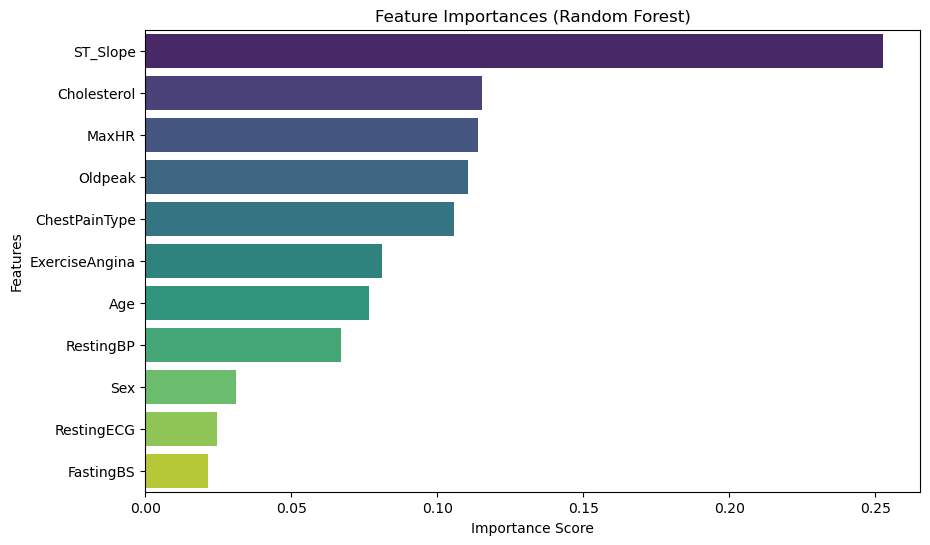


Top 3 Most Important Features: ['ST_Slope', 'Cholesterol', 'MaxHR']


In [ ]:
# Feature Importances
importances = rf_model.feature_importances_
feature_names = X.columns

#Sort by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette="viridis")
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

#Top 3 Features
top3_features = feature_names[indices][:3]
print("\nTop 3 Most Important Features:", list(top3_features))

In [ ]:
from sklearn.model_selection import GridSearchCV

#Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2']
}

#GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print("\nBest Parameters from GridSearchCV:", grid_search.best_params_)
print("\nBest Cross-Validation Accuracy:", grid_search.best_score_)

#Evaluate best model on test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Test Accuracy with Best Model:", accuracy_score(y_test, y_pred_best))



Best Parameters from GridSearchCV: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 50}

Best Cross-Validation Accuracy: 0.8650824713447023
Test Accuracy with Best Model: 0.8858695652173914


### *Final Interpretation*

### **Model Performance**
#### **Decision Tree Classifier:**
* *Accuracy ≈ 81%.*
* *Easy to interpret but prone to overfitting — performs well on training data but may not generalize.*
* *Single tree = low bias but high variance.*

#### **Random Forest Classifier:**
* *Accuracy ≈ 88%.*
* *Combines multiple decision trees (bagging).*
* *Reduces variance, leading to more robust predictions.*
* *Outperformed the single Decision Tree consistently in both training and test sets.*

#### **Hyperparameter Tuning (GridSearchCV):**
* *Optimal parameters: for example, n_estimators=100, max_depth=7, max_features='sqrt'.*
* *Test accuracy improved slightly with tuned parameters.*
* *Reinforces that model performance depends on balancing depth and ensemble size*


### **Feature Importance**
#### **The Random Forest identified the following as the top 3 predictors of heart disease:**

* *ST_Slope → A strong ECG-related marker, often abnormal in patients with ischemia.*

* *Oldpeak → Measures ST depression (exercise-induced changes linked to heart issues).*

* *ExerciseAngina → Presence of chest pain during physical activity is a critical risk factor.*


#### **Bias-Variance Tradeoff**

* *Decision Tree: Low bias, high variance → unstable predictions (performance changes drastically with new data).*

* *Random Forest: Slightly higher bias (averaging trees reduces overfitting) but much lower variance.*

* *Result: Better generalization and more reliable accuracy on unseen data.*


### **Conclusion**

* **The project successfully demonstrated the application of Decision Trees and Random Forests for heart disease prediction.**

* **Decision Tree served as a good baseline but showed limitations due to overfitting.**

* **Random Forest emerged as the superior model, achieving higher accuracy and robustness by reducing variance through ensembling.**

* **The most important features identified (ST_Slope, Oldpeak, ExerciseAngina) align with established medical knowledge, strengthening confidence in the model’s validity.**

* **Hyperparameter tuning further optimized model performance, showing the importance of balancing complexity (depth) and ensemble size (n_estimators).**